# Material de apoio


Leitura sugerida
1. An Introduction to Empirical Legal Research. Epstein & Martin. Capítulo 7, itens 7.0 e 7.1. Pp. 143-149.
2. Statistical Thinking for the 21st Century. Poldrack. Capítulo 9. (Itens 9.3.5.2 a 9.3.5.4 são mais ténicos e podem ser pulados em uma primeira leitura)
Disponível em: https://statsthinking21.github.io/statsthinking21-core-site/hypothesis-testing.html


Material complementar
1. [Esse vídeo em inglês explica alguns dos problemas com o valor-p a partir de um exemplo curioso e cômico.](https://www.youtube.com/watch?v=tLM7xS6t4FE)

# Estatística inferencial

Até aqui, vimos como podemos trabalhar com dados que são relevantes para o direito, em especial quando detinhamos **todas** as observações de um fenômeno. Quando falamos sobre os gastos do Estado, por exemplo, possuíamos *todos* os gastos realizados. O mesmo é verdade com relação aos processos do STF.

O que acontece quando não temos acesso à todos os dados existentes e aos mecanismos causais por trás deles? Nestas situações, precisamos de métodos para lidar com a incerteza e a aleatoriedade que é inerente aos fenômenos humanos (e mesmo da natureza).

No caso do direito, a maioria dos problemas interessantes possuem essa característica. Se você quer estudar como juízes se comportam diante de crimes violentos, por exemplo, é difícil imaginar que você terá acesso a todas as decisões de todos os juízes sobre todos os crimes violentos e não violentos. É muito mais provável que você tenha acesso a um subconjunto dessas decisões e precise tirar as suas conclusões a partir disso. A estatística fornece os métodos para estirmarmos a incerteza por trás dos dados que observamos, permitindo que tenhamos métricas do quão confiáveis e prováveis são os nossos resultados no universo total de casos.

Nesta aula inicial do bloco, veremos um exemplo envolvendo um jogo de dados para ilustrar esses conceitos.

## O caso

Em um site de *bets* online, um popular jogo de cassino é o arremesso de dados. Em um jogo de dois dados de seis faces, a distribuição de pagamentos é a seguinte:

- 2 e 12 - (1 combinação de 36) - 30 pra 1

- 3 e 11 - (2 combinações de 36) - 16 pra 1

- 4 e 10 - (3 combinações de 36) - 10 pra 1

- 5 e 9 - (4 combinações de 36) - 8 pra 1

- 6 e 8 - (5 combinações de 36) - 7 pra 1

- 7 - (6 combinações de 36) - 5 pra 1

Em todas as apostas, o cassino tem uma vantagem. Porém, alguns funcionários do cassino são desonestos e alteram os dados de maneira a fraudar o cassino. Nessa fraude, um comparsa do funcionário aposta em um número que geralmente é improvável (por exemplo, o número 3), que se tornou mais provável por causa de uma fraude envolvendo os dados.

Suponha que você é o advogado do cassino e quer saber se algum dos funcionários engajou nessa prática, mas não tem como verificar cada um dos dados que estão sendo utilizados. Por outro lado, você sabe que o cassino guarda um registro cuidadoso dos resultados de todos os arremessos de dados. É possível descobrir se os dados são honestos a partir destas informações?

Um primeiro passo para responder a essa pergunta é observar como se comportam dados honestos e desonestos em termos de resultados. Assim, podemos comparar os resultados de cada funcionário com essas referências para saber se houve fraude ou não.

## Construindo os nossos dados

Esta não é uma aula de trabalhos manuais. Portanto, vamos fazer os nossos dados usando código e um pacote: `random`. 

Em específico, vamos usar a função `randint()` para criar nossa própria função: `arremesso_honesto()`.

In [1]:
import pandas as pd
import seaborn as sns
from random import randint

def arremesso_honesto():
    
    #cria nossos dados que podem ter, cada um, um resultado que varia entre 1 e 6
    dado1 = randint(1, 6)
    dado2 = randint(1, 6)
    
    #retorna o resultado do arremesso
    return dado1 + dado2

In [2]:
arremesso_honesto()

8

A cada vez que executamos a função `arremesso_honesto()`, fazemos um arremesso dos nossos dois dados e vemos qual é o resultado. 

Nós sabemos que o nosso dado é honesto: nós mesmos criamos a função e não inserimos nada de diferente nela. Mas a partir de um único arremesso, é impossível saber se o dado de fato é honesto sem conhecer a sua fabricação. 

Para conhecermos o padrão de arremessos, precisamos lançar o dado várias vezes e guardar as informações em algum lugar, para depois investigá-la. Vamos fazer isso usando uma lista chamada `aremessos_honestos`:

In [3]:
arremessos = []

for arremesso in range(0, 10000):
    arremessos.append(arremesso_honesto())

In [4]:
len(arremessos)

10000

Nossa lista agora contém 10000 resultados de arremessos. Usando o pandas para transformar a lista em uma `pd.Series`, podemos usar os métodos que já conhecemos (por exemplo, value_counts), para começar a investigar o padrão de resultados.

<Axes: ylabel='Count'>

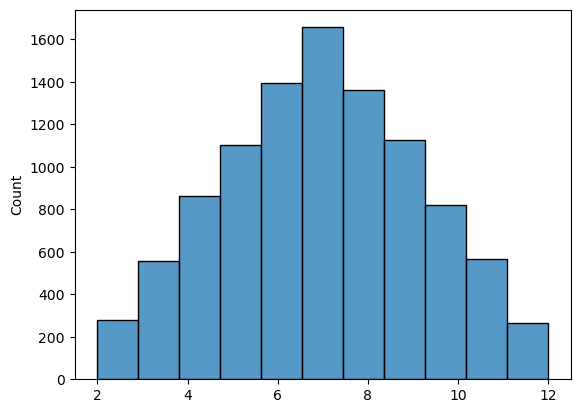

In [5]:
arremessos_honestos = pd.Series(arremessos)

# vamos usar 11 bins já que é o número de resultados possíveis
sns.histplot(arremessos_honestos, bins=11)

In [6]:
arremessos_honestos.mean()

np.float64(6.9835)

In [7]:
arremessos_honestos.mode()

0    7
dtype: int64

In [8]:
arremessos_honestos.median()

np.float64(7.0)

In [9]:
#notem que arremessos_honestos é uma série, e não um dataframe
#isso significa que não devemos passar um nome de coluna antes do método .value_counts()
arremessos_honestos.value_counts()

7     1657
6     1397
8     1362
9     1126
5     1104
4      863
10     820
11     568
3      558
2      281
12     264
Name: count, dtype: int64

Vamos ver também o percentual de cada ocorrência:

In [10]:
arremessos_honestos.value_counts(normalize=True)

7     0.1657
6     0.1397
8     0.1362
9     0.1126
5     0.1104
4     0.0863
10    0.0820
11    0.0568
3     0.0558
2     0.0281
12    0.0264
Name: proportion, dtype: float64

O método value_counts() retorna os dados ordenados por número de ocorrências, mas isso pode ser um pouco estranho quando estamos lidando com dados. Para ordenar pelo índice, vamos criar um dataframe com essas informações:

In [35]:
df_honesto = arremessos_honestos.value_counts().reset_index()

df_honesto.head(2)

,index,count
0,7,1657
1,6,1397


In [36]:
# vamos ordenar pela coluna index
df_honesto.sort_values("index")

,index,count
9,2,281
8,3,558
5,4,863
4,5,1104
1,6,1397
0,7,1657
2,8,1362
3,9,1126
6,10,820
7,11,568


Conforme o esperado a partir da tabela de premiação, os números mais frequentes se encontram no meio do nosso dataframe (números como 6, 7 e 8).

Uma forma tradicional de representar esse tipo de informação é através de um **histograma**:

<Axes: >

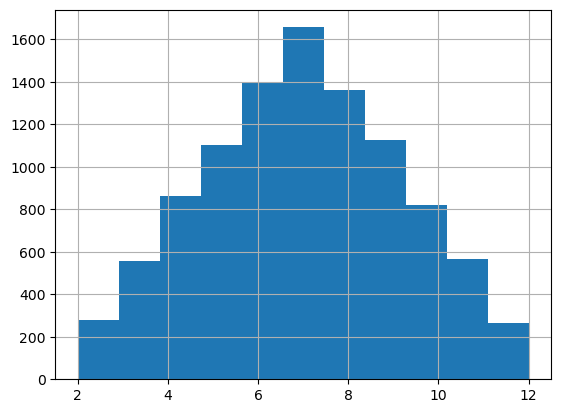

In [12]:
arremessos_honestos.hist(bins = 11) #o argumento bins determina quantas barras terá o gráfico

In [13]:
arremessos_honestos.mean()

np.float64(6.9835)

In [14]:
arremessos_honestos.median()

np.float64(7.0)

In [15]:
arremessos_honestos.mode()

0    7
dtype: int64

Já sabemos o que esperar de um histograma honesto. Mas 10000 rodadas parece excessivo! O que será que pode acontecer com os dados se observarmos 10 funcionários diferentes, todos honestos, e cada um faz apenas 200 arremessos?

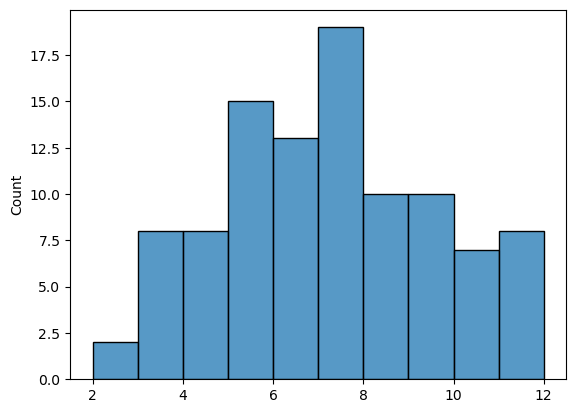

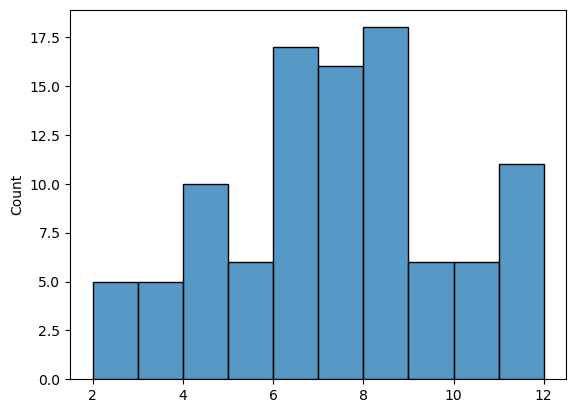

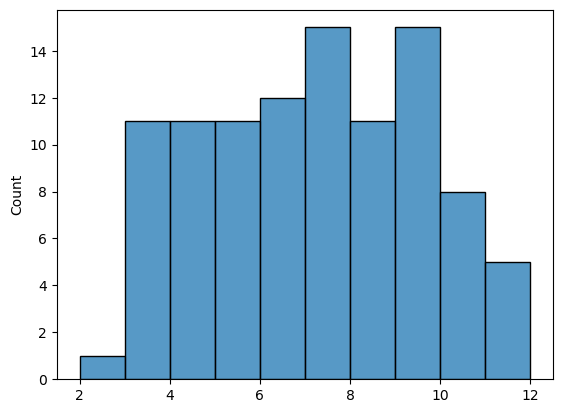

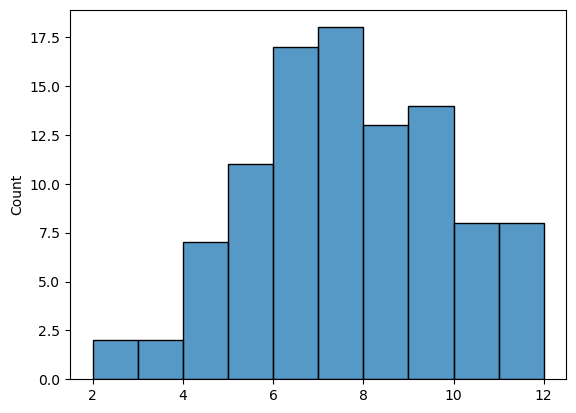

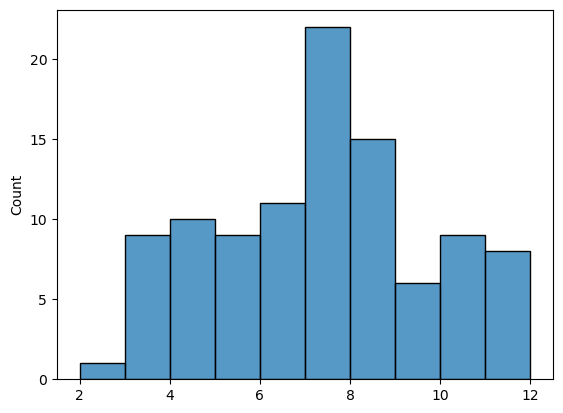

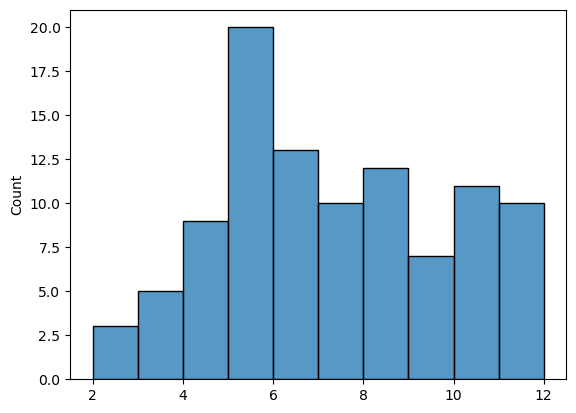

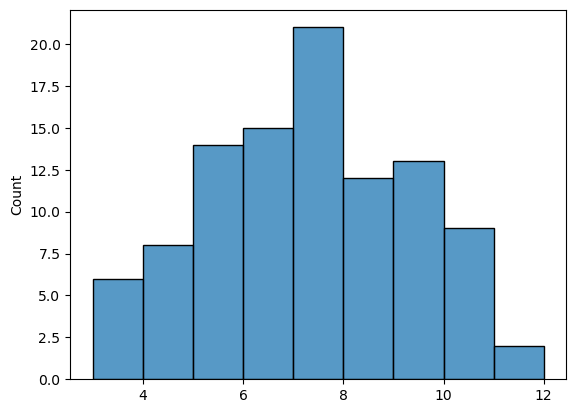

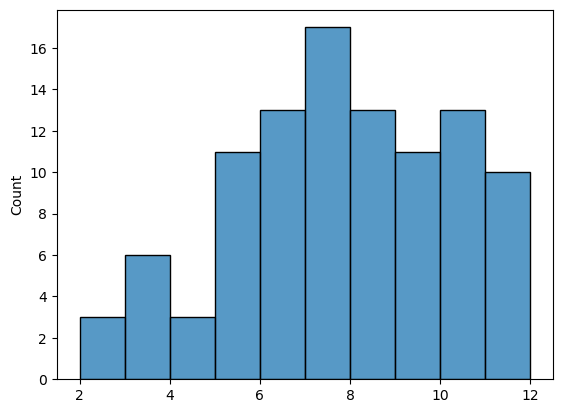

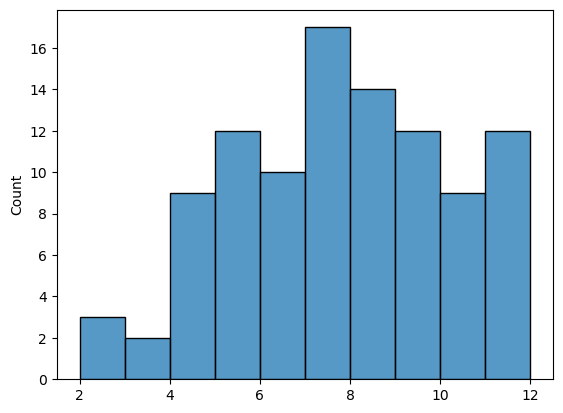

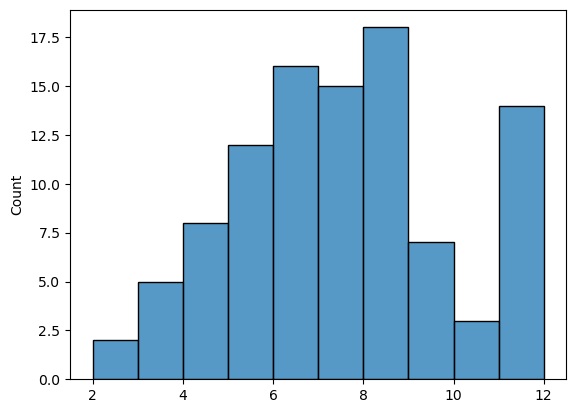

In [39]:
from matplotlib import pyplot as plt

for funcionario in range(0, 10):
    esse_funcionario = []
    for arremesso in range(0, 100):
        esse_funcionario.append(arremesso_honesto())
    esse_funcionario = pd.Series(esse_funcionario)
    sns.histplot(esse_funcionario, binwidth=1)
    
    #código para exibir cada histograma de forma separada
    plt.show()
    plt.close()
    

Alguns resultados se parecem muito com o resultado dos 10000 arremessos, mas outros possuem características bem diferentes... Isso mostra como existe aleatoriedade mesmo quando consideramos um dado que sabemos ser perfeitamente honesto. De uma forma geral, porém, os histogramas se parecem com o que observamos para muitos casos.

Vamos olhar agora para o que aconteceria se tivéssemos um dado adulterado. Esse dado tem uma probabilidade menor de retornar os números 5 e 6.

In [40]:
def arremesso_adulterado():
    dado1 = randint(1, 6) #dado honesto
    dado2 = randint(1, 6)
    
    if dado2 == 5 or dado2 == 6: #diminui a probabilidade de que esses 3 números caiam
        dado2 = randint(1, 6)
    
    return dado1 + dado2

In [41]:
arremessos_adulterados = []

for arremesso in range(0, 10000):
    arremessos_adulterados.append(arremesso_adulterado())

arremessos_adulterados = pd.Series(arremessos_adulterados)

Para comparação, vamos imprimir os histogramas de 10000 arremessos adulterados e não adulterados um ao lado do outro:

Text(0.5, 1.0, 'Arremessos adulterados')

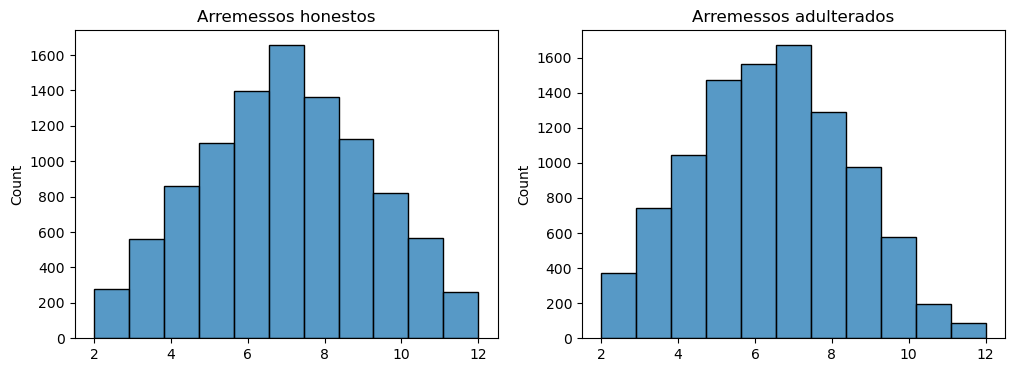

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(arremessos_honestos, bins=11, ax=ax[0])
ax[0].set_title("Arremessos honestos")

sns.histplot(arremessos_adulterados, bins=11, ax=ax[1])
ax[1].set_title("Arremessos adulterados")

Parece que os arremessos adulterados estão mais para a esquerda (retornam mais números baixos) do que os arremessos honestos. O que aconteceria se tivéssemos 10 funcionários desonestos usando esse conjunto de dados (com 200 lançamentos cada)?

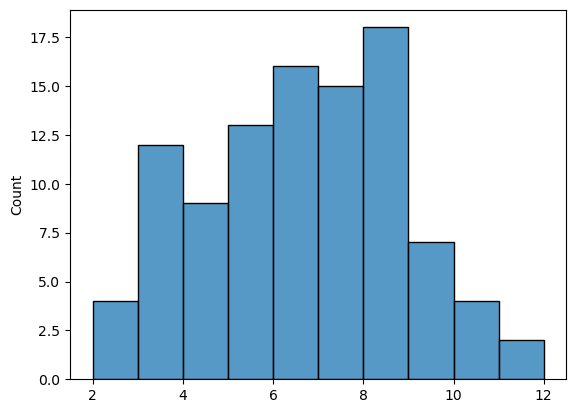

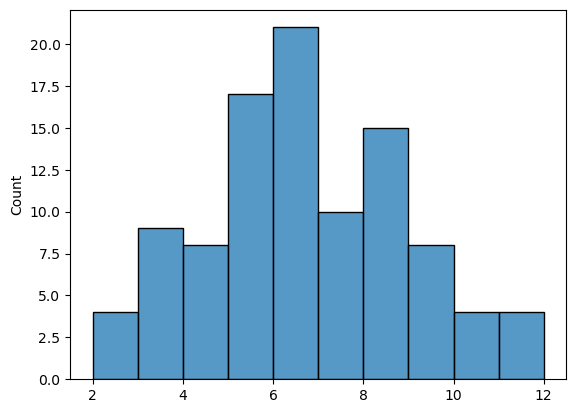

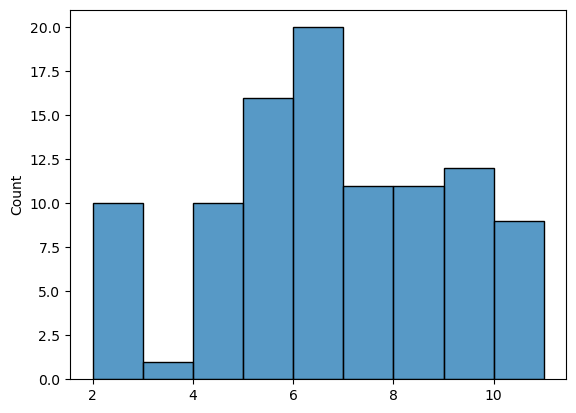

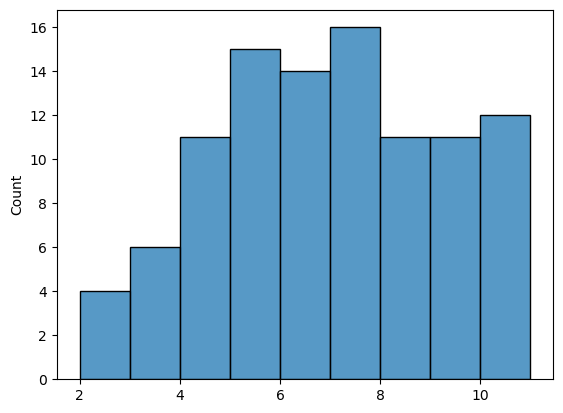

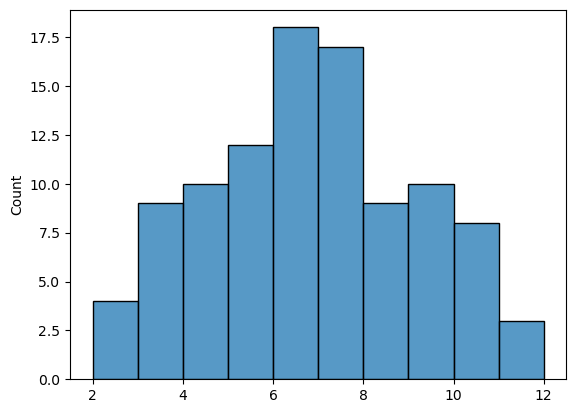

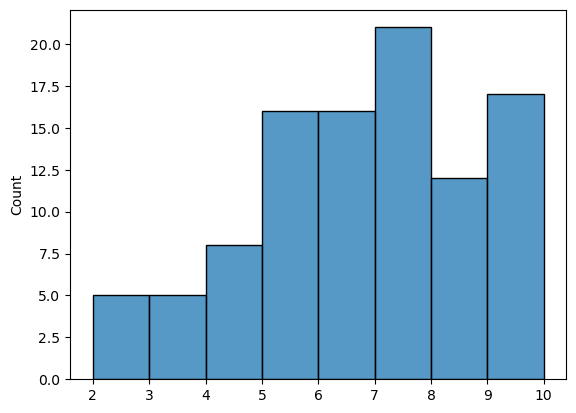

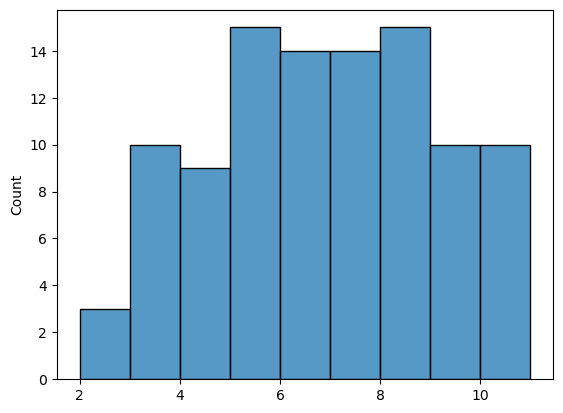

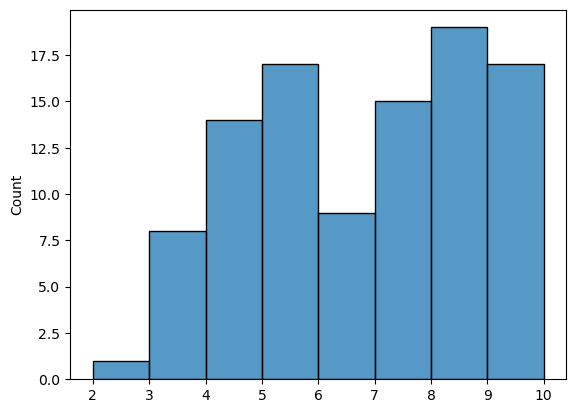

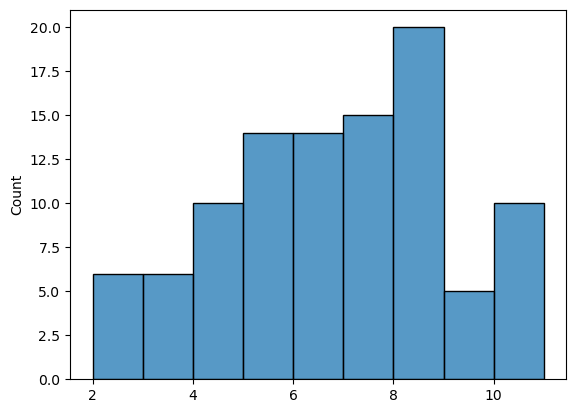

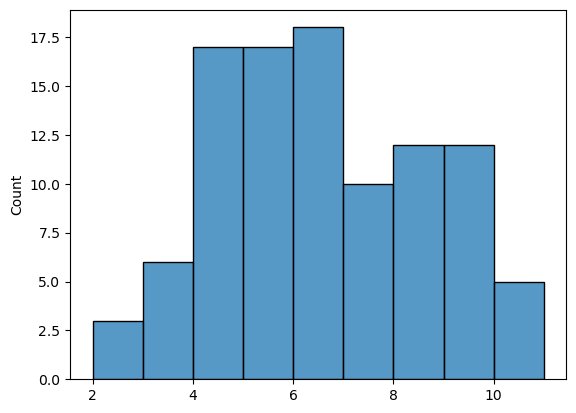

In [44]:
for funcionario in range(0, 10):
    esse_funcionario = []
    for arremesso in range(0, 100):
        esse_funcionario.append(arremesso_adulterado())
    esse_funcionario = pd.Series(esse_funcionario)
    sns.histplot(esse_funcionario, binwidth=1)
    
    #código para exibir cada histograma de forma separada
    plt.show()
    plt.close()
    

Novamente, alguns funcionários parecem se aproximar da distribuição adulterada, mas vários outros parecem perfeitamente normais.

Um outro tipo de adulterador poderia fazer com que os números mais altos fossem mais prováveis:

In [45]:
def arremesso_alto():
    dado1 = randint(1, 6)  # dado honesto
    dado2 = randint(1, 6)
    
    # diminui a probabilidade de que esses 3 números caiam
    if dado2 == 1 or dado2 == 2 or dado2 == 3:
        dado2 = randint(1, 6)

    return dado1 + dado2

In [46]:
arremessos_altos = []

for arremesso in range(0, 10000):
    arremessos_altos.append(arremesso_alto())

arremessos_altos = pd.Series(arremessos_altos)

Text(0.5, 1.0, 'Arremessos adulterados para cima')

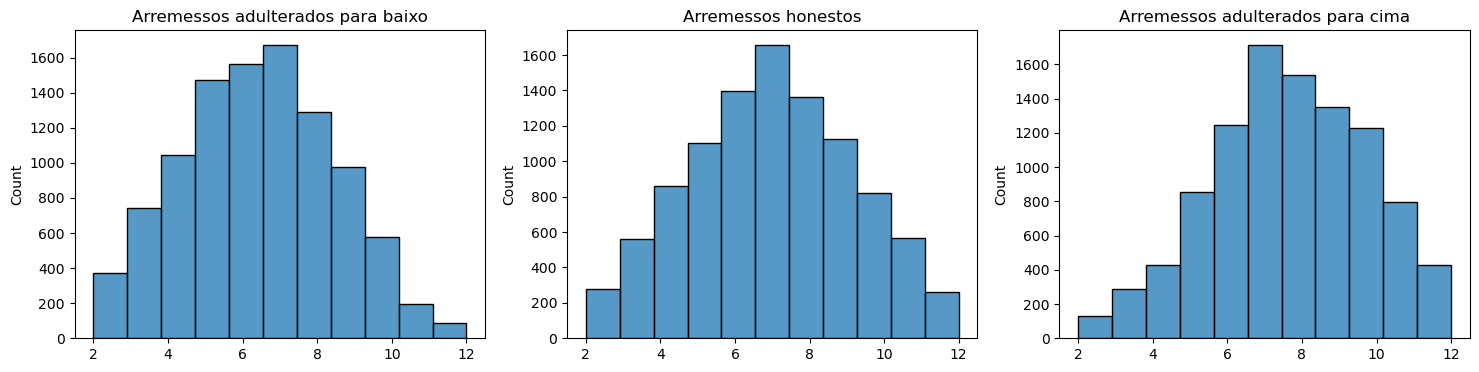

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(18, 4))


sns.histplot(arremessos_adulterados, bins=11, ax=ax[0])
ax[0].set_title("Arremessos adulterados para baixo")

sns.histplot(arremessos_honestos, bins=11, ax=ax[1])
ax[1].set_title("Arremessos honestos")

sns.histplot(arremessos_altos, bins=11, ax=ax[2])
ax[2].set_title("Arremessos adulterados para cima")


O que a estatística inferencial nos ajuda a fazer é comparar resultados reais com os resultados que nós esperaríamos dadas certas suposições. Assim, no caso do problema dos dados adulterados, precisamos assumir que os dados são honestos, e a soma dos arremessos teria média 7.

Nesse caso, a estatística inferencial pode comparar os resultados efetivamente observados com aqueles que seriam esperados se o dado fosse honesto (o histograma dos resultados honestos) e nos dar uma medida da nossa confiança na honestidade dos dados. 

Assim, podemos não só saber se as informações obtidas apontam para a desonestidade (ou honestidade) de um dado funcionário, mas também qual o grau de confiança que devemos ter nessa conclusão.

## Testando hipóteses

Quando falamos de estatísticas inferenciais, geralmente estamos tentando **rejeitar uma hipótese nula**. Essa é a hipótese que bate nossas suposições e possibilitam a realização do teste. 

Se eu quero saber se tem uma diferença estatisticamente significativa entre a altura de duas populações, por exemplo, o teste vai assumir que elas são iguais (hipótese nula) e verá qual é o grau de certeza de que temos de que essa hipótese não é verdadeira. 

Isso é feito em geral através de um **valor p** ou **p valor**, que nos diz **qual é a probabilidade daquele resultado ocorrer se a hipótese nula for verdadeira**. 

Assim, um valor p *menor* significa que temos *mais* evidências a partir dos dados de que a hipótese nula é falsa e que, portanto, a nossa hipótese é verdadeira.

Como podemos expressar o problema do cassino em termos de hipótese nula?

Queremos saber se algum funcionário é *desonesto*. Nossa hipótese é que algum funcionário é desonesto. A hipótese nula, por outro lado, é que todos os funcionários são honestos. Assim, precisamos de um teste que nos permita comparar a distribuição de um funcionário, com aquela que seria observada se o dado fosse honesto.

### Teste t

Poderíamos fazer isso usando um **t-test** (teste-t): o valor p desse teste é uma **métrica da confiança que temos de que a hipótese nula é falsa**.

Existem versões diferentes do teste t. Em todos eles, queremos fazer comparações sobre a média. Por exemplo, que a média é igual, menor, ou maior que determinado valor. Que médias de dois conjuntos são iguais, ou que a média de um conjunto é maior que a de outro.

Em geral, consideramos a hipótese nula rejeitada quando o valor p é **menor do que 0,05**. Esse número é um pouco arbitrário, com cientistas argumentando pelo valor de 0,005 e algumas pessoas admitindo valores entre 0,1 e 0,05 como relevantes. 

O importante de se ter em mente é que valores p maiores que 0,2 raramente significam alguma coisa: muito embora quanto menor o valor p, maior a confiança que temos em rejeitar a hipótese nula, o contrário não é necessariamente verdade, de maneira que um t-test de distribuições muito diferentes pode acabar resultado em um valor p relativamente baixo.

*OBS: Veremos mais sobre testes estatísticos específicos nas próximas aulas. O objetivo do t-test nessa aula é apenas para mostrar como funciona o valor p e a ideia de teste estatístico.*

Para ver como o t-test funciona, vamos gerar uma amostra com 100 lançamentos de cada uma das distribuições e comparar cada uma delas com `arremessos_honestos`.

Vamos gerar um conjunto de exemplo

In [25]:
alguns_arremessos_honestos = list()
alguns_arremessos_adulterados = list()

for a in range(100):
    alguns_arremessos_honestos.append(arremesso_honesto())
    alguns_arremessos_adulterados.append(arremesso_adulterado())

In [26]:
from scipy.stats import ttest_ind #importa o ttest
    
#testa cada um dos dois
#o ttest_ind() aceita dois argumentos que são duas listas ou séries numéricas que serão comparadas
#aprenderemos mais sobre as presunções que esse teste faz nas próximas aulas.

p_honesto = ttest_ind(arremessos_honestos, alguns_arremessos_honestos)[1]
p_desonesto = ttest_ind(arremessos_honestos, alguns_arremessos_adulterados)[1]

print("Probabilidade de que a média de 'arremessos_honestos' seja igual à média de 'alguns_arremessos_honestos':", round(p_honesto, 4))
print("Probabilidade de que a média de 'arremessos_honestos' seja igual à média de 'alguns_arremessos_adulterados':", round(p_desonesto, 4))

Probabilidade de que a média de 'arremessos_honestos' seja igual à média de 'alguns_arremessos_honestos': 0.9557
Probabilidade de que a média de 'arremessos_honestos' seja igual à média de 'alguns_arremessos_adulterados': 0.0026


O teste indica de maneira correta que a hipótese nula é verdadeira no caso dos 100 aremessos honestos (p > 0,05), e que ela é falsa no caso dos 100 arremessos adulterados (p < 0,05).

# Exercício

## Aplicando o t-test ao caso

Vamos imaginar que o cassino nos forneceu um dataframe contendo informações a respeito de cada um dos funcionários.

In [27]:
import pandas as pd

In [28]:
df_cassino = pd.read_csv("http://bit.ly/2x9fDzi")
df_cassino.head()

,Sonny,Tom,Fredo,Michael,Connie
0,4,5,6,2,11
1,6,7,7,8,4
2,6,8,6,6,11
3,4,6,3,9,3
4,8,8,5,10,10


In [29]:
df_cassino.shape

(200, 5)

Cada uma das colunas do dataframe representam um funcionário diferente, enquanto as linhas representam um arremesso de dados. Podemos, por exemplo, criar um histograma para o primeiro funcionário ("Sonny").

<Axes: >

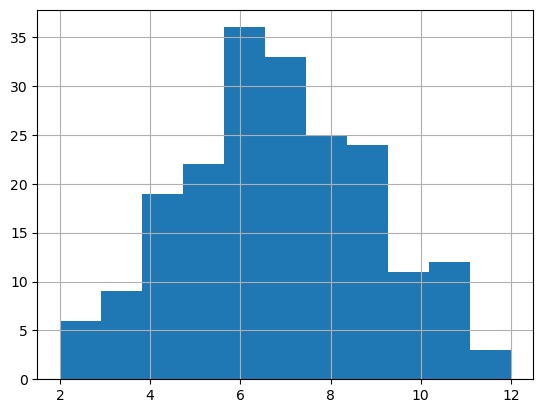

In [30]:
df_cassino.Sonny.hist(bins=11)

In [31]:
df_cassino.head()

,Sonny,Tom,Fredo,Michael,Connie
0,4,5,6,2,11
1,6,7,7,8,4
2,6,8,6,6,11
3,4,6,3,9,3
4,8,8,5,10,10


#### Desafio

Use t-tests para descobrir qual dos funcionários é desonesto. Utilize a coluna de cada funcionário e o conjunto de arremessos honestou gerado abaixo:

In [32]:
from random import randint

def arremesso_honesto():
    
    #cria nossos dados que podem ter, cada um, um resultado que varia entre 1 e 6
    dado1 = randint(1, 6)
    dado2 = randint(1, 6)
    
    #retorna o resultado do arremesso
    return dado1 + dado2

# Conjunto de arremessos honestos
aremessos_honestos = [arremesso_honesto() for x in range(8000)]

**DICA: Você deve comparar os arremessos de cada um dos funcionários com arremessos honestos**

## Resumo

- Estatísticas inferenciais servem para quantificar nossa incerteza e confiança a respeito de uma hipótese específica, dado que não temos acesso a todos os dados disponíveis, ou que não conhecemos os mecanismos causais que geram os resultados observados.

- Estatísticas inferenciais tentam rejeitar uma hipótese nula